### Introduction

In this notebook, we will be investigating the sales and ratings of video games from 2000 to 2016. For this the dataset `Video_Games_Sales_as_at_22_Dec_2016.csv` prepared by `Rush Kirubi` was downloaded from kaggle.com (https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

The `CRISP-DM` (Cross-industry standard process for data mining) process will be followed during this notebook.

After analyzing data, we will try to also predict some made up new games with a self-created machine learning model.

**Data gathering section**

The video game dataset, previously downloaded (see introduction) will be loaded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
#Read in the video game sales including ratings
df = pd.read_csv("./Video_Games_Sales_as_at_22_Dec_2016.csv")

**Data gathering summary**

The data was imported.

**Data Assessment section**

After the gathering of data, let's analyze it

In [3]:
# Prepare a new column marking which rows to drop
df["drop"] = False

# show general information
print(df.shape)
print(df.describe())

(16719, 17)
       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000  

In [4]:
#Games with future release date
df.loc[df["Year_of_Release"] > 2016, ["drop"]] = True
df[df["Year_of_Release"] > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,drop
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.00,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E,True
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,NaN,NaN,NaN,NaN,NaN,NaN,True
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,True
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,True


In [5]:
#Games without developers should be dropped.
df.loc[df.Developer.isnull() & df.Critic_Score.notnull(), ["drop"]] = True
df[df["Developer"].isnull()][df.Critic_Score.notnull()] #6

C:\Users\emerw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,drop
5929,AMF Bowling 2004,XB,2003.0,Sports,Mud Duck Productions,0.22,0.06,0.0,0.01,0.30,48.0,6.0,4.4,8.0,NaN,NaN,True
8778,Blitz: The League II,PS3,2008.0,Sports,Midway Games,0.11,0.02,0.0,0.02,0.15,62.0,25.0,7.5,15.0,NaN,NaN,True
10697,Harry Potter and the Deathly Hallows - Part 2,PC,2011.0,Action,Electronic Arts,0.05,0.04,0.0,0.01,0.10,43.0,12.0,5,56.0,NaN,NaN,True
14654,The Wolf Among Us,X360,2011.0,Adventure,Telltale Games,0.01,0.02,0.0,0.00,0.03,83.0,5.0,7.7,88.0,NaN,NaN,True
14677,Future Tactics: The Uprising,XB,2004.0,Strategy,JoWood Productions,0.02,0.01,0.0,0.00,0.03,61.0,24.0,tbd,NaN,NaN,NaN,True
15624,Rugby 06,XB,2006.0,Sports,Electronic Arts,0.01,0.00,0.0,0.00,0.02,76.0,18.0,tbd,NaN,NaN,NaN,True


In [6]:
# Further data analysis
df["Rating"].value_counts() # E, T, M, E10+ EC, K-A, RP, AO
df["Name"].value_counts() # Multiple games are duplicated 
df["Platform"].value_counts() # 31 platforms
df["Year_of_Release"].value_counts()
df["Genre"].value_counts()
df["Publisher"].value_counts()
df["NA_Sales"].value_counts()
df["EU_Sales"].value_counts()
df["JP_Sales"].value_counts()
df["Other_Sales"].value_counts()
df["Global_Sales"].value_counts()
df["Critic_Score"].value_counts()
df["Critic_Count"].value_counts()
df["User_Score"].value_counts() #contains tbd - set to NaN
df["User_Count"].value_counts()
df["Developer"].value_counts()

Ubisoft                 204
EA Sports               172
EA Canada               167
Konami                  162
Capcom                  139
                       ... 
Coffee Stain Studios      1
Metropolis Software       1
Dearsoft                  1
Human Entertainment       1
Opus Studio               1
Name: Developer, Length: 1696, dtype: int64

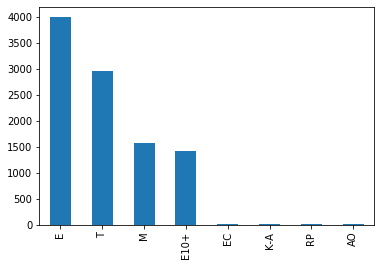

In [7]:
df["Rating"].value_counts().plot.bar();

In [8]:
df.groupby("Name").count().shape #No of duplicated games

(11562, 16)

In [9]:
df[df.Name == "Ratatouille"] #Example duplicated game

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,drop
1598,Ratatouille,DS,2007.0,Action,THQ,0.49,0.62,0.0,0.14,1.25,NaN,NaN,NaN,NaN,NaN,NaN,False
2442,Ratatouille,PS2,2007.0,Action,THQ,0.31,0.00,0.0,0.53,0.85,65.0,9.0,8,11.0,Asobo Studio,E,False
3069,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.27,0.0,0.16,0.66,64.0,7.0,7.1,7.0,Locomotive Games,E,False
3902,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0.0,0.10,0.51,55.0,8.0,4.8,4.0,Heavy Iron Studios,E,False
3948,Ratatouille,Wii,2007.0,Action,THQ,0.43,0.03,0.0,0.04,0.50,62.0,16.0,6.7,12.0,Asobo Studio,E,False
6399,Ratatouille,X360,2007.0,Action,THQ,0.23,0.02,0.0,0.02,0.27,56.0,14.0,tbd,NaN,Heavy Iron Studios,E,False
7682,Ratatouille,GBA,2007.0,Action,THQ,0.14,0.05,0.0,0.00,0.20,65.0,4.0,tbd,NaN,Helixe,E,False
9016,Ratatouille,GC,2007.0,Action,THQ,0.11,0.03,0.0,0.00,0.14,60.0,7.0,5.6,7.0,Asobo Studio,E,False
14516,Ratatouille,PC,2007.0,Action,THQ,0.01,0.01,0.0,0.00,0.03,NaN,NaN,7.9,9.0,Asobo Studio,E,False


**Data assessment summary**

During the assessment the following was noticed:
* The dataset contains four games, which have not been released since the creation of the dataset (end of 2016). The games in question are rather unknown and were planned to be released from 2017 and 2020. Investigating deeper shows, that most of the particular games have not been rated yet, but nevertheless show up in sales. This data was classified as to be dropped.
* There are four games having no developer, but critic scores. The lines in question will be dropped.
* Games with the same name were created on different platforms by different developers or have been rebooted.
    * Due to the fact, that there is no way to distinguish a port from a recreation or reboot, the games in question will uniquely renamed instead of meaned/summed.
* Some User_Scores are set to "NaN"


**Data Cleansing section**

The assessed issues in the dataset will now be cleaned up.

In [10]:
def clean_data(df):
    """Cleans the video game dataframe.
    Includes dropping games without developers, not yet released games, renaming of duplicated games (e.g. different platforms)
    
    INPUT: Dirty Dataframe
    
    OUTPUT: Clean Dataframe"""
    
    #Find (and then rename) duplicated games
    totals = 0
    dupes = df.groupby("Name").count()
    dupes = dupes[dupes["Platform"] > 1]
    for i in range(len(dupes)):
        duped_games = dupes.iloc[i].name
        duped_idx = df.loc[df["Name"] == duped_games].index
        cnt = 0
        for idx in duped_idx:
            df.iloc[idx, df.columns.get_loc('Name')] = df.iloc[idx]["Name"] + "_" + str(cnt)
            cnt += 1
            totals += 1
    print("Renamed {} duplicated games.".format(totals))

    #Drop previously identified rows and the "drop" column
    if ("drop" in df.columns):
        totals = len(df[df["drop"] == True])
        idx_to_drop = df[df["drop"] == True].index
        df.drop(idx_to_drop, inplace=True)
        
        df.drop(columns=["drop"], inplace=True)
    
        print("Dropped {} corrupted rows".format(totals))

    #User score is tbd - needs to be cleaned up
    totals = len(df.loc[df["User_Score"] == "tbd", ["User_Score"]])
    df.loc[df["User_Score"] == "tbd", ["User_Score"]] = np.nan
    df.astype({"User_Score": 'float32'}).dtypes
    df[["User_Score"]] = df[["User_Score"]].apply(pd.to_numeric) 
    print("Set {} User_Scores from 'tbd' to NaN".format(totals))
    
    return df
    
df = clean_data(df)

Renamed 7961 duplicated games.
Dropped 10 corrupted rows
Set 2422 User_Scores from 'tbd' to NaN


**Data cleansing summary**

The previously assessed data was cleaned up.
* 7961 duplicated games were renamed (added _n as suffix)
* 10 corrupted rows were dropped
* 2422 User_Scores were set from 'tbd' to NaN

**Data analysis, modelling and visualization section**

After the data was cleaned up, we can have a closer look at the analysis.
Here some questions we are looking forward to find the answers for:
* Scores over time
* Publisher ratings over time
* Count of reviews over time
* Sales over time
* Genre ratings
* Platform ratings

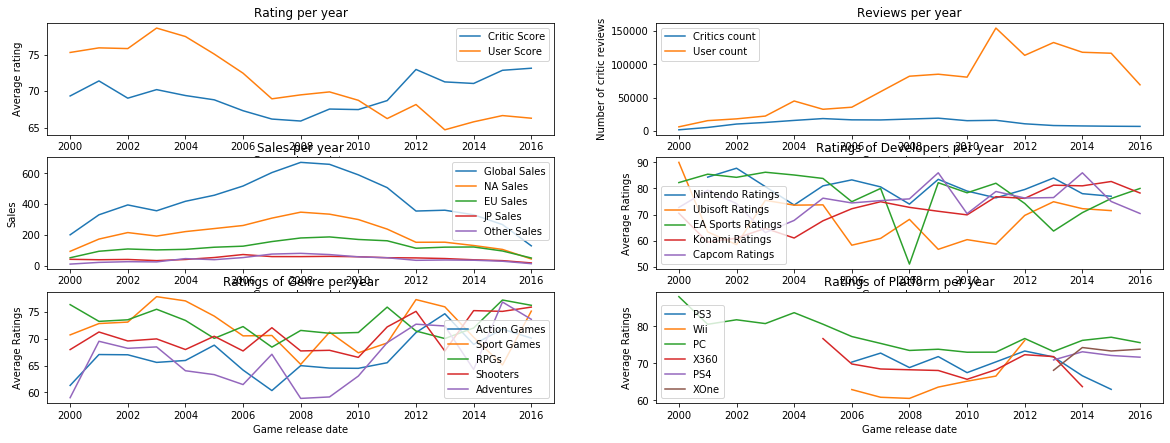

In [11]:
# Games with a release date below 2000 have below 100 critic scores. 
# For the "Scores over time" and "Scores by publisher" analysis this is not helpful and will be ignored
df_newGames = df[df["Year_of_Release"] >= 2000.0]


plt.rcParams["figure.figsize"] = (20,7)
#Create two plots per line
plt.subplot(3, 2, 1)
#First to plots are in regards to critic and user scores and counts
plt.title('Rating per year')
plt.xlabel("Game release date")
plt.ylabel('Average rating')
plt.annotate("asd", (2009, 23))
plt.plot(df_newGames.groupby("Year_of_Release").mean()["Critic_Score"], label="Critic Score")
plt.plot(df_newGames.groupby("Year_of_Release").mean()["User_Score"]*10, label="User Score")
plt.legend()
plt.subplot(3, 2, 2)
plt.title('Reviews per year')
plt.xlabel("Game release date")
plt.ylabel('Number of critic reviews')
plt.plot(df_newGames.groupby("Year_of_Release").sum()["Critic_Count"], label="Critics count")
plt.plot(df_newGames.groupby("Year_of_Release").sum()["User_Count"], label="User count")
plt.legend()
plt.subplot(3, 2, 3)
#The third plot looks at the sales 
plt.title('Sales per year')
plt.xlabel("Game release date")
plt.ylabel('Sales')
plt.plot(df_newGames.groupby("Year_of_Release").sum()["Global_Sales"], label="Global Sales")
plt.plot(df_newGames.groupby("Year_of_Release").sum()["NA_Sales"], label="NA Sales")
plt.plot(df_newGames.groupby("Year_of_Release").sum()["EU_Sales"], label="EU Sales")
plt.plot(df_newGames.groupby("Year_of_Release").sum()["JP_Sales"], label="JP Sales")
plt.plot(df_newGames.groupby("Year_of_Release").sum()["Other_Sales"], label="Other Sales")
plt.legend();
plt.subplot(3, 2, 4)
#The fourth plot looks at the publisher ratings and sales 
plt.xlabel("Game release date")
plt.ylabel('Average Ratings')
plt.title('Ratings of Developers per year')
plt.plot(df_newGames[df_newGames["Developer"] == "Nintendo"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Nintendo Ratings")
plt.plot(df_newGames[df_newGames["Developer"] == "Ubisoft"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Ubisoft Ratings")
plt.plot(df_newGames[df_newGames["Developer"] == "EA Sports"].groupby("Year_of_Release")["Critic_Score"].mean(), label="EA Sports Ratings")
plt.plot(df_newGames[df_newGames["Developer"] == "Konami"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Konami Ratings")
plt.plot(df_newGames[df_newGames["Developer"] == "Capcom"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Capcom Ratings")
plt.legend();
#Plot 5 shows the Genre ratings
plt.subplot(3, 2, 5)
plt.xlabel("Game release date")
plt.ylabel('Average Ratings')
plt.title('Ratings of Genre per year')
plt.plot(df_newGames[df_newGames["Genre"] == "Action"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Action Games")
plt.plot(df_newGames[df_newGames["Genre"] == "Sports"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Sport Games")
plt.plot(df_newGames[df_newGames["Genre"] == "Role-Playing"].groupby("Year_of_Release")["Critic_Score"].mean(), label="RPGs")
plt.plot(df_newGames[df_newGames["Genre"] == "Shooter"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Shooters")
plt.plot(df_newGames[df_newGames["Genre"] == "Adventure"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Adventures")
plt.legend();
#plot 6 shows the Platform ratings
plt.subplot(3, 2, 6)
plt.xlabel("Game release date")
plt.ylabel('Average Ratings')
plt.title('Ratings of Platform per year')
plt.plot(df_newGames[df_newGames["Platform"] == "PS3"].groupby("Year_of_Release")["Critic_Score"].mean(), label="PS3")
plt.plot(df_newGames[df_newGames["Platform"] == "Wii"].groupby("Year_of_Release")["Critic_Score"].mean(), label="Wii")
plt.plot(df_newGames[df_newGames["Platform"] == "PC"].groupby("Year_of_Release")["Critic_Score"].mean(), label="PC")
plt.plot(df_newGames[df_newGames["Platform"] == "X360"].groupby("Year_of_Release")["Critic_Score"].mean(), label="X360")
plt.plot(df_newGames[df_newGames["Platform"] == "PS4"].groupby("Year_of_Release")["Critic_Score"].mean(), label="PS4")
plt.plot(df_newGames[df_newGames["Platform"] == "XOne"].groupby("Year_of_Release")["Critic_Score"].mean(), label="XOne")
plt.legend();


In [12]:
#Perform predictive analysis. 
# We need to remove games without ratings first
df_rated = df[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating', 'Critic_Score']]
df_rated = df_rated.dropna(subset=["Critic_Score"])

X = df_rated[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Developer', 'Rating']]
y = df_rated['Critic_Score']

df_enc = pd.get_dummies(X, dummy_na=True)
fill_mean = lambda col: col.fillna(col.mean()) # Mean function
df_enc = df_enc.apply(fill_mean)

X_train, X_test, y_train, y_test = train_test_split(df_enc, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
preds_lm = lm_model.predict(X_test)

print('R2: ', format(r2_score(y_test,preds_lm)))
print('MSE: ', format(mean_squared_error(y_test,preds_lm)))

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
preds_nb = nb_model.predict(X_test)

print('Accuracy score: ', format(accuracy_score(y_test,preds_nb)))

R2:  -6.242624955786166e+28
MSE:  1.188768423187789e+31
Accuracy score:  0.028688524590163935


In [13]:
#Try to predict a few Nintendo games
to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_PC'] = 1
to_pred['Year_of_Release'] = 2017
to_pred['Genre_Shooter'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_M'] = 1

result = lm_model.predict(to_pred)
print("Our mature Nintendo shooter (Metroid?) on a PC in 2017 will have a rating of {}".format(result[0]))

to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_Wii'] = 1
to_pred['Year_of_Release'] = 2017
to_pred['Genre_Shooter'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_M'] = 1

result = lm_model.predict(to_pred)
print("Our mature Nintendo shooter (Metroid?) on a Wii in 2017 will have a rating of {}".format(result[0]))

to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_X360'] = 1
to_pred['Year_of_Release'] = 2017
to_pred['Genre_Shooter'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_M'] = 1

result = lm_model.predict(to_pred)
print("Our mature Nintendo shooter (Metroid?) on a XBox360 in 2017 will have a rating of {}".format(result[0]))

to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_PS3'] = 1
to_pred['Year_of_Release'] = 2017
to_pred['Genre_Shooter'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_M'] = 1

result = lm_model.predict(to_pred)
print("Our mature Nintendo shooter (Metroid?) on a PS3 in 2017 will have a rating of {}".format(result[0]))

to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_3DS'] = 1
to_pred['Year_of_Release'] = 2020
to_pred['Genre_Role-Playing'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_E'] = 1

result = lm_model.predict(to_pred)
print("Our Nintendo RPG for everyone (Paper Mario?) on a 3DS in 2020 will have a rating of {}".format(result[0]))

to_pred = pd.DataFrame(columns=df_enc.columns)
to_pred.loc[0] = 0
to_pred['Platform_Wii'] = 1
to_pred['Year_of_Release'] = 2016
to_pred['Genre_Racing'] = 1
to_pred['Publisher_Nintendo'] = 1
to_pred['Developer_Nintendo'] = 1
to_pred['Rating_E'] = 1

result = lm_model.predict(to_pred)
print("Our Nintendo Racer (Mario Kart?) for everyone on a Wii in 2016 will have a rating of {}".format(result[0]))

Our mature Nintendo shooter (Metroid?) on a PC in 2017 will have a rating of 83.9375
Our mature Nintendo shooter (Metroid?) on a Wii in 2017 will have a rating of 75.625
Our mature Nintendo shooter (Metroid?) on a XBox360 in 2017 will have a rating of 78.375
Our mature Nintendo shooter (Metroid?) on a PS3 in 2017 will have a rating of 80.3125
Our Nintendo RPG for everyone (Paper Mario?) on a 3DS in 2020 will have a rating of 75.75
Our Nintendo Racer (Mario Kart?) for everyone on a Wii in 2016 will have a rating of 71.96875


**Data analysis, modelling and visualization summary**

* There seems to be no direct trend between year of release and critic scores, though it looks like 2016 has been a very successful year 
* The number of ratings by critics seems to be stable, while the number of user ratings has risen from 2000 until 2015. In 2016 the number went down again
* With the raise of the count of user ratings, the average rating from users has a downward trend. In general the curves however do match 
* It is visible, that the global sales reached a peak in 2008 and since then went down. While the global sales went down, the average critic score has risen. It may be suspected, that the higher ratings are supposed to incraese the sales, but it did not hold through
* Nintendo, out of the major developers, seems to be delivering the best and more constant results. This matches with my experience as well. EA Sports seems to be doing a more or less constant job as well with their regular titles. Konami slowly has risen over time.
* None of the major publishers analyzed in the last plot seem to be responsible for the 2012 peak of good ratings
* PC Games are rated higher than console games
* It is hard to analyze Genres, but it seems that RPGs and Sport games generally receive favorable critics
* Linear Regression and MultinomialNB was tried to be used in order to make predictions in regards to game ratings, but the dataset is too small in order to receive good results. 
    * For LinReg, the R2 score is 0.29, while the MSE is 137
    * For MNB the accuracy is 34.2%
* By changing the approach (hot encoding categorical variables):
    * For LinReg, the R2 score sank to -7.89, while the MSE reduced to 1.54
    * For MNB the accuracy rose to 41%
* Further adapting the model:
    * For LinReg we got better R2 and MSE scores, (-6-24, 1.19)
    * But for MNB a lower accuracy for naive bayes 28.69%
* This is not a good model, but it was tried to predict a few games in the future. The following observatiosn were made:
    * Shooters seem to have a high rating for Nintendo. 
    * The PC has the best rating when just changing the platform
        * This matches with the previous analysis made